<a href="https://colab.research.google.com/github/NourhanZahran/Collection-data-chemical.space.analysis/blob/main/smote_caspase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("PubChemFP_best.csv")


In [ ]:
df = pd.read_csv("PubChemFP_best.csv")


X = df.drop("label",axis=1)

y = df["label"]

In [ ]:
X.to_csv("Pubchem_features.csv",index=None)

In [ ]:
X.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,...,PubchemFP840,PubchemFP841,PubchemFP842,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP866,PubchemFP872,PubchemFP875
0,1,1,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split,cross_validate

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,matthews_corrcoef,roc_auc_score,make_scorer,auc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_train.value_counts()

0    1141
1     543
Name: label, dtype: int64

In [ ]:
smote = SMOTE(random_state=42,sampling_strategy=0.5)

In [ ]:
X_train,y_train = smote.fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

0    1141
1     570
Name: label, dtype: int64

In [ ]:
SN = make_scorer(recall_score)

SP = make_scorer(recall_score,pos_label=0)


Q = make_scorer(accuracy_score)

MCC = make_scorer(matthews_corrcoef)


scoring = {"SN":SN,"SP":SP,"Q":Q,"MCC":MCC}

In [ ]:
rf = RandomForestClassifier(random_state=12)

In [ ]:
cv_results = pd.DataFrame(cross_validate(rf,X_train,y_train,cv=10,scoring=scoring))

In [ ]:
cv_results.describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,0.434275,0.102774,0.355277,0.369044,0.373100,0.532793,0.586462
score_time,10.0,0.028070,0.006822,0.020814,0.022017,0.025866,0.035134,0.037288
test_SN,10.0,0.900000,0.029876,0.842105,0.881579,0.903509,0.912281,0.947368
test_SP,10.0,0.947407,0.021898,0.921053,0.932018,0.947368,0.956426,0.991228
test_Q,10.0,0.931610,0.013276,0.906433,0.929825,0.932749,0.941520,0.947674
test_MCC,10.0,0.847336,0.029174,0.791574,0.843765,0.851684,0.868206,0.882518


In [ ]:
rf.fit(X_train,y_train)

yHat_train= rf.predict(X_train)

yHat_test = rf.predict(X_test)



In [ ]:
print(recall_score(y_train,yHat_train)) #SN
print(recall_score(y_train,yHat_train,pos_label=0)) #SP
print(matthews_corrcoef(y_train,yHat_train)) #MCC
print(accuracy_score(y_train,yHat_train)) # Q

0.9964912280701754
0.9938650306748467
0.9882085624029051
0.994739918176505


In [ ]:
print(recall_score(y_test,yHat_test))
print(recall_score(y_test,yHat_test,pos_label=0))
print(matthews_corrcoef(y_test,yHat_test))
print(accuracy_score(y_test,yHat_test))
print(roc_auc_score(y_test,rf.predict_proba(X_test)[:, 1]))


0.9337748344370861
0.933579335793358
0.8580115885434076
0.933649289099526
0.9769189413748443


In [ ]:
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay,classification_report

In [ ]:
import matplotlib.pyplot as plt


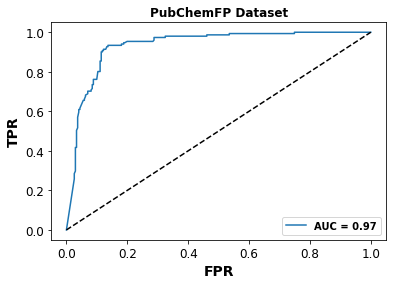

In [ ]:


RocCurveDisplay.from_estimator(rf,X_test,y_test)
plt.plot([0,1],[0,1],"--k")

plt.xlabel("FPR",weight="bold",size=14)
plt.ylabel("TPR",weight="bold",size=14)
plt.xticks(size=12)
plt.yticks(size=12)


plt.title("PubChemFP Dataset",weight="bold")
legend_properties = {'weight':'bold'}


plt.legend(["AUC = 0.97"],prop=legend_properties,loc="lower right")

plt.savefig("PubChemFP ROC.tiff",dpi=300)

plt.show()


In [ ]:
print(classification_report(y_test,yHat_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       271
           1       0.89      0.93      0.91       151

    accuracy                           0.93       422
   macro avg       0.92      0.93      0.93       422
weighted avg       0.94      0.93      0.93       422



In [ ]:
cm = confusion_matrix(y_test,yHat_test)

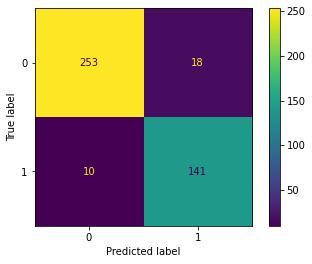

In [ ]:
disp = ConfusionMatrixDisplay(cm)

disp.plot()

In [ ]:
import pickle

In [ ]:
pickle.dump(rf, open('caspase_model.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('caspase_model.pkl', 'rb'))

In [ ]:
feat_imp = pd.Series(rf.feature_importances_,index=X.columns).nlargest(15)

In [ ]:
feat_imp

PubchemFP338    0.030454
PubchemFP687    0.023206
PubchemFP646    0.020719
PubchemFP20     0.020463
PubchemFP650    0.020358
PubchemFP432    0.018695
PubchemFP602    0.017968
PubchemFP335    0.016601
PubchemFP483    0.014350
PubchemFP645    0.013061
PubchemFP536    0.013019
PubchemFP686    0.011134
PubchemFP580    0.010207
PubchemFP736    0.009624
PubchemFP685    0.009426
dtype: float64

In [ ]:
import seaborn as sns


In [ ]:
import matplotlib.pyplot as plt

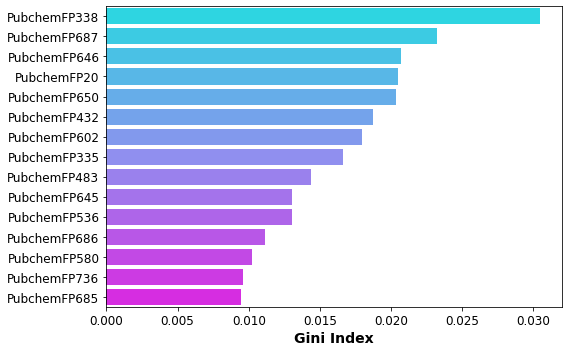

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x =feat_imp,y = feat_imp.index,palette="cool")

plt.xlabel("Gini Index",weight="bold",size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.tight_layout()

plt.savefig("feat_importance.png",dpi=300)
plt.show()

In [ ]:
 #atom presence or counts
PubchemFP338    C(~C)(~C)(~H)(~N)


These bits test for the presence of Simple SMARTS patterns (cont.)
PubchemFP687  O=C-C-C-C=O
PubchemFP646   O=C-N-C-[#1]

These bits test for the presence or count of the described chemical ring system.
PubchemFP20   >= 4 O
These bits test for the presence of atom nearest neighbor patterns, regardless of bond order
PubchemFP650  O=C-N-C=O


These bits test for the presence of simple SMARTS patterns, regardless of count, but where bond orders are specific and bond aromaticity matches both single and double bonds.
PubchemFP432  C(-C)(-C)(=O)
PubchemFP602  O=C-C-N-C

PubchemFP335    C(~C)(~C)(~C)(~H)

These bits test for the presence of simple SMARTS patterns, regardless of count, but where bond orders are specific and bond aromaticity matches both single and double bonds.
PubchemFP483  C(~C)(~C)(~H)(~N)


PubchemFP645  O=C-N-C-C

PubchemFP536   O=C-C-N
PubchemFP686   O=C-C-C-C-O
PubchemFP580    O=C-C-C-N
PubchemFP736  Cc1cc(S)ccc1
PubchemFP685   O=C-C-C-C-N



SyntaxError: ignored

In [ ]:
df = pd.read_csv("ESTATFP_BEST.csv")


X = df.drop("label",axis=1)

y = df["label"]

In [ ]:
X.to_csv("Estate_features.csv",index=None)

In [ ]:
X.head()

,EStateFP7,EStateFP8,EStateFP9,EStateFP10,EStateFP11,EStateFP12,EStateFP13,EStateFP15,EStateFP16,EStateFP17,...,EStateFP38,EStateFP42,EStateFP48,EStateFP49,EStateFP50,EStateFP51,EStateFP53,EStateFP54,EStateFP70,EStateFP75
0,0,0,1,0,0,1,1,0,1,1,...,1,0,0,0,0,0,1,0,0,1
1,1,0,1,0,1,1,1,0,1,1,...,1,0,0,0,1,0,0,1,0,0
2,1,0,1,0,0,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,0,1,1,0,1,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,1,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split,cross_validate

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,matthews_corrcoef,roc_auc_score,make_scorer,auc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_train.value_counts()

0    1141
1     543
Name: label, dtype: int64

In [ ]:
smote = SMOTE(random_state=12,sampling_strategy=0.5)

In [ ]:
X_train,y_train = smote.fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

0    1141
1     570
Name: label, dtype: int64

In [ ]:
SN = make_scorer(recall_score)

SP = make_scorer(recall_score,pos_label=0)


Q = make_scorer(accuracy_score)

MCC = make_scorer(matthews_corrcoef)


scoring = {"SN":SN,"SP":SP,"Q":Q,"MCC":MCC}

In [ ]:
rf = RandomForestClassifier(random_state=12)

In [ ]:
cv_results = pd.DataFrame(cross_validate(rf,X_train,y_train,cv=10,scoring=scoring))

In [ ]:
cv_results.describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,0.285254,0.073535,0.214123,0.219722,0.251515,0.362431,0.378262
score_time,10.0,0.025018,0.006373,0.018781,0.019899,0.022252,0.029130,0.036186
test_SN,10.0,0.857895,0.045637,0.771930,0.828947,0.850877,0.894737,0.912281
test_SP,10.0,0.906247,0.032732,0.868421,0.880187,0.899123,0.925439,0.964912
test_Q,10.0,0.890133,0.023130,0.859649,0.871532,0.885965,0.912281,0.918129
test_MCC,10.0,0.757664,0.050318,0.690580,0.717595,0.757201,0.806568,0.817670


In [ ]:
rf.fit(X_train,y_train)

yHat_train= rf.predict(X_train)

yHat_test = rf.predict(X_test)



In [ ]:
print(recall_score(y_train,yHat_train)) #SN
print(recall_score(y_train,yHat_train,pos_label=0)) #SP
print(matthews_corrcoef(y_train,yHat_train)) #MCC
print(accuracy_score(y_train,yHat_train)) # Q

0.956140350877193
0.9456617002629273
0.888408257589138
0.9491525423728814


In [ ]:
print(recall_score(y_test,yHat_test))
print(recall_score(y_test,yHat_test,pos_label=0))
print(matthews_corrcoef(y_test,yHat_test))
print(accuracy_score(y_test,yHat_test))
print(roc_auc_score(y_test,rf.predict_proba(X_test)[:, 1]))


0.8940397350993378
0.8856088560885609
0.7650643947887296
0.8886255924170616
0.9322963759438919


In [ ]:
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay,classification_report

In [ ]:
import matplotlib.pyplot as plt


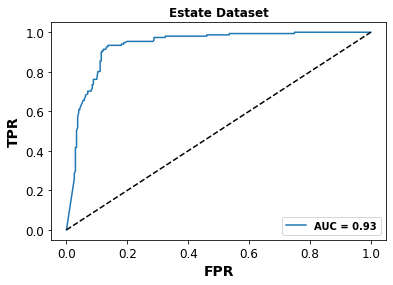

In [ ]:


RocCurveDisplay.from_estimator(rf,X_test,y_test)
plt.plot([0,1],[0,1],"--k")

plt.xlabel("FPR",weight="bold",size=14)
plt.ylabel("TPR",weight="bold",size=14)
plt.xticks(size=12)
plt.yticks(size=12)


plt.title("Estate Dataset",weight="bold")
legend_properties = {'weight':'bold'}


plt.legend(["AUC = 0.93"],prop=legend_properties,loc="lower right")

plt.savefig("Estate ROC.tiff",dpi=300)

plt.show()


In [ ]:
print(classification_report(y_test,yHat_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       271
           1       0.81      0.89      0.85       151

    accuracy                           0.89       422
   macro avg       0.88      0.89      0.88       422
weighted avg       0.89      0.89      0.89       422



In [ ]:
cm = confusion_matrix(y_test,yHat_test)

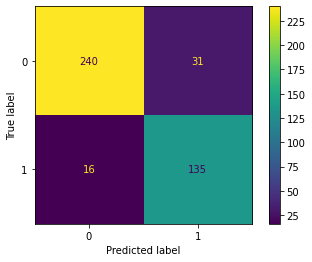

In [ ]:
disp = ConfusionMatrixDisplay(cm)

disp.plot()

In [ ]:
import pickle

In [ ]:
pickle.dump(rf, open('caspase_model.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('caspase_model.pkl', 'rb'))

In [ ]:
feat_imp = pd.Series(rf.feature_importances_,index=X.columns).nlargest(15)

In [ ]:
feat_imp

EStateFP13    0.118674
EStateFP53    0.075601
EStateFP38    0.066391
EStateFP34    0.063320
EStateFP24    0.056564
EStateFP7     0.050525
EStateFP18    0.049655
EStateFP30    0.048266
EStateFP9     0.043978
EStateFP32    0.040551
EStateFP51    0.036911
EStateFP36    0.036904
EStateFP11    0.034138
EStateFP16    0.032957
EStateFP25    0.032366
dtype: float64

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

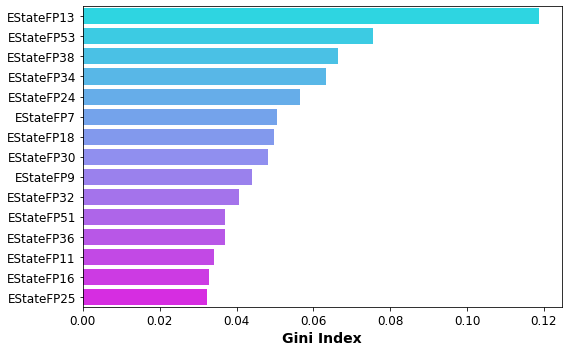

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x =feat_imp,y = feat_imp.index,palette="cool")

plt.xlabel("Gini Index",weight="bold",size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.tight_layout()

plt.savefig("feat_importance.png",dpi=300)
plt.show()

In [ ]:
df = pd.read_csv("AP_BEST.csv")


X = df.drop("label",axis=1)

y = df["label"]

In [ ]:
X.to_csv("AP_features.csv",index=None)

In [ ]:
X.head()

,AD2D2,AD2D3,AD2D4,AD2D6,AD2D7,AD2D8,AD2D9,AD2D11,AD2D12,AD2D13,...,AD2D744,AD2D754,AD2D755,AD2D759,AD2D760,AD2D761,AD2D765,AD2D766,AD2D770,AD2D780
0,1,1,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split,cross_validate

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,matthews_corrcoef,roc_auc_score,make_scorer,auc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_train.value_counts()

0    1141
1     543
Name: label, dtype: int64

In [ ]:
smote = SMOTE(random_state=12,sampling_strategy=0.5)

In [ ]:
X_train,y_train = smote.fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

0    1141
1     570
Name: label, dtype: int64

In [ ]:
SN = make_scorer(recall_score)

SP = make_scorer(recall_score,pos_label=0)


Q = make_scorer(accuracy_score)

MCC = make_scorer(matthews_corrcoef)


scoring = {"SN":SN,"SP":SP,"Q":Q,"MCC":MCC}

In [ ]:
rf = RandomForestClassifier(random_state=12)

In [ ]:
cv_results = pd.DataFrame(cross_validate(rf,X_train,y_train,cv=10,scoring=scoring))

In [ ]:
cv_results.describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,0.435402,0.090319,0.366800,0.377173,0.386328,0.508941,0.585114
score_time,10.0,0.028164,0.007473,0.021674,0.022588,0.024654,0.031444,0.043553
test_SN,10.0,0.857895,0.041722,0.789474,0.828947,0.859649,0.894737,0.912281
test_SP,10.0,0.937750,0.026008,0.885965,0.929825,0.934211,0.947368,0.982456
test_Q,10.0,0.911142,0.024210,0.865497,0.897661,0.918129,0.923977,0.947674
test_MCC,10.0,0.800136,0.053937,0.701832,0.769737,0.816058,0.829383,0.881474


In [ ]:
rf.fit(X_train,y_train)

yHat_train= rf.predict(X_train)

yHat_test = rf.predict(X_test)



In [ ]:
print(recall_score(y_train,yHat_train)) #SN
print(recall_score(y_train,yHat_train,pos_label=0)) #SP
print(matthews_corrcoef(y_train,yHat_train)) #MCC
print(accuracy_score(y_train,yHat_train)) # Q

0.9578947368421052
0.9868536371603857
0.9485627203753713
0.9772063120981882


In [ ]:
print(recall_score(y_test,yHat_test))
print(recall_score(y_test,yHat_test,pos_label=0))
print(matthews_corrcoef(y_test,yHat_test))
print(accuracy_score(y_test,yHat_test))
print(roc_auc_score(y_test,rf.predict_proba(X_test)[:, 1]))


0.8874172185430463
0.9188191881918819
0.8006310097418988
0.9075829383886256
0.9584321008773002


In [ ]:
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay,classification_report

In [ ]:
import matplotlib.pyplot as plt


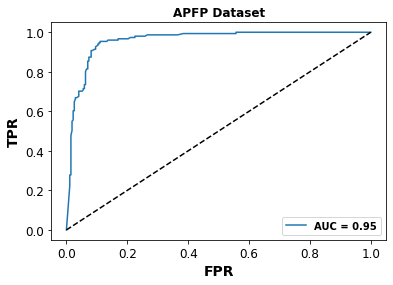

In [ ]:


RocCurveDisplay.from_estimator(rf,X_test,y_test)
plt.plot([0,1],[0,1],"--k")

plt.xlabel("FPR",weight="bold",size=14)
plt.ylabel("TPR",weight="bold",size=14)
plt.xticks(size=12)
plt.yticks(size=12)


plt.title("APFP Dataset",weight="bold")
legend_properties = {'weight':'bold'}


plt.legend(["AUC = 0.95"],prop=legend_properties,loc="lower right")

plt.savefig("APFP ROC.tiff",dpi=300)

plt.show()


In [ ]:
print(classification_report(y_test,yHat_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       271
           1       0.86      0.89      0.87       151

    accuracy                           0.91       422
   macro avg       0.90      0.90      0.90       422
weighted avg       0.91      0.91      0.91       422



In [ ]:
cm = confusion_matrix(y_test,yHat_test)

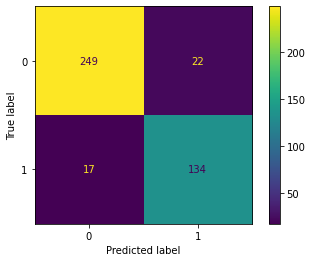

In [ ]:
disp = ConfusionMatrixDisplay(cm)

disp.plot()

In [ ]:
import pickle

In [ ]:
pickle.dump(rf, open('caspase_model.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('caspase_model.pkl', 'rb'))

In [ ]:
feat_imp = pd.Series(rf.feature_importances_,index=X.columns).nlargest(15)

In [ ]:
feat_imp

AD2D336    0.040643
AD2D726    0.034922
AD2D258    0.031947
AD2D15     0.029578
AD2D648    0.025343
AD2D180    0.023956
AD2D93     0.022094
AD2D414    0.021721
AD2D482    0.021440
AD2D170    0.021143
AD2D570    0.019272
AD2D704    0.017524
AD2D92     0.017101
AD2D492    0.017026
AD2D183    0.016557
dtype: float64

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

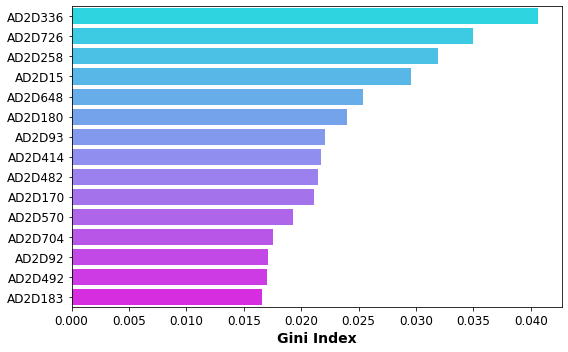

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x =feat_imp,y = feat_imp.index,palette="cool")

plt.xlabel("Gini Index",weight="bold",size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.tight_layout()

plt.savefig("feat_importance.png",dpi=300)
plt.show()

In [ ]:
pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv("MACC_BEST.csv")


In [ ]:
X = df.drop("label",axis=1)

y = df["label"]

In [ ]:
X.to_csv("macc_features.csv",index=None)

In [ ]:
X.head()

,MACCSFP8,MACCSFP11,MACCSFP13,MACCSFP16,MACCSFP17,MACCSFP19,MACCSFP20,MACCSFP21,MACCSFP23,MACCSFP24,...,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
0,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
4,0,0,0,1,0,1,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split,cross_validate

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,matthews_corrcoef,roc_auc_score,make_scorer,auc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_train.value_counts()

0    1141
1     543
Name: label, dtype: int64

In [ ]:
smote = SMOTE(random_state=12,sampling_strategy=0.5)

In [ ]:
X_train,y_train = smote.fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

0    1141
1     570
Name: label, dtype: int64

In [ ]:
SN = make_scorer(recall_score)

SP = make_scorer(recall_score,pos_label=0)


Q = make_scorer(accuracy_score)

MCC = make_scorer(matthews_corrcoef)


scoring = {"SN":SN,"SP":SP,"Q":Q,"MCC":MCC}

In [ ]:
rf = RandomForestClassifier(random_state=12)

In [ ]:
cv_results = pd.DataFrame(cross_validate(rf,X_train,y_train,cv=10,scoring=scoring))

In [ ]:
cv_results.describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,0.267361,0.006909,0.254413,0.264836,0.268974,0.270819,0.278287
score_time,10.0,0.020301,0.003180,0.017464,0.018828,0.019350,0.020398,0.028734
test_SN,10.0,0.907018,0.039706,0.824561,0.894737,0.921053,0.929825,0.947368
test_SP,10.0,0.939512,0.027595,0.894737,0.921053,0.942982,0.954233,0.982456
test_Q,10.0,0.928692,0.016967,0.900585,0.921053,0.929825,0.935953,0.959064
test_MCC,10.0,0.842374,0.036275,0.777359,0.827560,0.845387,0.855755,0.907568


In [ ]:
rf.fit(X_train,y_train)

yHat_train= rf.predict(X_train)

yHat_test = rf.predict(X_test)



In [ ]:
print(recall_score(y_train,yHat_train)) #SN
print(recall_score(y_train,yHat_train,pos_label=0)) #SP
print(matthews_corrcoef(y_train,yHat_train)) #MCC
print(accuracy_score(y_train,yHat_train)) # Q

0.9912280701754386
0.9912357581069238
0.9803332475427222
0.9912331969608417


In [ ]:
print(recall_score(y_test,yHat_test))
print(recall_score(y_test,yHat_test,pos_label=0))
print(matthews_corrcoef(y_test,yHat_test))
print(accuracy_score(y_test,yHat_test))
print(roc_auc_score(y_test,rf.predict_proba(X_test)[:, 1]))


0.9205298013245033
0.9261992619926199
0.83760864202633
0.9241706161137441
0.9697954595439994


In [ ]:
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay,classification_report

In [ ]:
import matplotlib.pyplot as plt


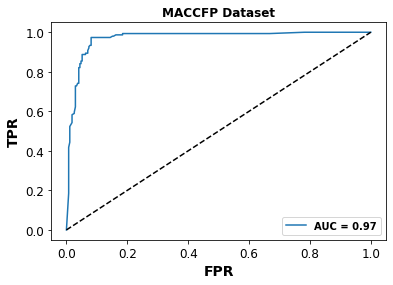

In [ ]:


RocCurveDisplay.from_estimator(rf,X_test,y_test)
plt.plot([0,1],[0,1],"--k")

plt.xlabel("FPR",weight="bold",size=14)
plt.ylabel("TPR",weight="bold",size=14)
plt.xticks(size=12)
plt.yticks(size=12)


plt.title("MACCFP Dataset",weight="bold")
legend_properties = {'weight':'bold'}


plt.legend(["AUC = 0.97"],prop=legend_properties,loc="lower right")

plt.savefig("MACCFP ROC.tiff",dpi=300)

plt.show()


In [ ]:
print(classification_report(y_test,yHat_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       271
           1       0.87      0.92      0.90       151

    accuracy                           0.92       422
   macro avg       0.91      0.92      0.92       422
weighted avg       0.93      0.92      0.92       422



In [ ]:
cm = confusion_matrix(y_test,yHat_test)

In [ ]:
disp = ConfusionMatrixDisplay(cm)

disp.plot()

In [ ]:
import pickle

In [ ]:
pickle.dump(rf, open('caspase_model.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('caspase_model.pkl', 'rb'))

In [ ]:
feat_imp = pd.Series(rf.feature_importances_,index=X.columns).nlargest(15)

In [ ]:
feat_imp

MACCSFP140    0.043999
MACCSFP155    0.033472
MACCSFP136    0.033020
MACCSFP111    0.025881
MACCSFP152    0.023765
MACCSFP129    0.022476
MACCSFP53     0.021411
MACCSFP89     0.020625
MACCSFP32     0.019633
MACCSFP146    0.018650
MACCSFP33     0.018491
MACCSFP131    0.017339
MACCSFP67     0.017055
MACCSFP144    0.016342
MACCSFP74     0.015901
dtype: float64

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

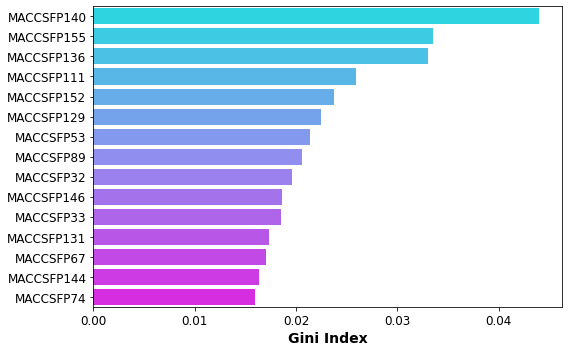

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x =feat_imp,y = feat_imp.index,palette="cool")

plt.xlabel("Gini Index",weight="bold",size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.tight_layout()

plt.savefig("feat_importance.png",dpi=300)
plt.show()

In [ ]:
df = pd.read_csv("Sub_BEST.csv")


X = df.drop("label",axis=1)

y = df["label"]

In [ ]:
X.to_csv("sub_features.csv",index=None)

In [ ]:
X.head()

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP8,SubFP9,SubFP10,SubFP12,...,SubFP293,SubFP294,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,0
1,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split,cross_validate

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,matthews_corrcoef,roc_auc_score,make_scorer,auc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_train.value_counts()

0    1141
1     543
Name: label, dtype: int64

In [ ]:
smote = SMOTE(random_state=12,sampling_strategy=0.5)

In [ ]:
X_train,y_train = smote.fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

In [ ]:
SN = make_scorer(recall_score)

SP = make_scorer(recall_score,pos_label=0)


Q = make_scorer(accuracy_score)

MCC = make_scorer(matthews_corrcoef)


scoring = {"SN":SN,"SP":SP,"Q":Q,"MCC":MCC}

In [ ]:
rf = RandomForestClassifier(random_state=12)

In [ ]:
cv_results = pd.DataFrame(cross_validate(rf,X_train,y_train,cv=10,scoring=scoring))

In [ ]:
cv_results.describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,0.256277,0.010802,0.243991,0.250980,0.254420,0.259320,0.282775
score_time,10.0,0.020613,0.001392,0.018765,0.019318,0.020688,0.021950,0.022204
test_SN,10.0,0.873684,0.050170,0.807018,0.824561,0.885965,0.907895,0.947368
test_SP,10.0,0.935126,0.024916,0.894737,0.918860,0.938596,0.951754,0.973684
test_Q,10.0,0.914647,0.025492,0.865497,0.897661,0.918129,0.928363,0.953488
test_MCC,10.0,0.808916,0.057047,0.698750,0.774744,0.814869,0.840265,0.896266


In [ ]:
rf.fit(X_train,y_train)

yHat_train= rf.predict(X_train)

yHat_test = rf.predict(X_test)



In [ ]:
print(recall_score(y_train,yHat_train)) #SN
print(recall_score(y_train,yHat_train,pos_label=0)) #SP
print(matthews_corrcoef(y_train,yHat_train)) #MCC
print(accuracy_score(y_train,yHat_train)) # Q

0.9614035087719298
0.9710780017528484
0.9280966207297999
0.9678550555230859


In [ ]:
print(recall_score(y_test,yHat_test))
print(recall_score(y_test,yHat_test,pos_label=0))
print(matthews_corrcoef(y_test,yHat_test))
print(accuracy_score(y_test,yHat_test))
print(roc_auc_score(y_test,rf.predict_proba(X_test)[:, 1]))


0.9139072847682119
0.9188191881918819
0.822744245687407
0.9170616113744076
0.9534102294665331


In [ ]:
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay,classification_report

In [ ]:
import matplotlib.pyplot as plt


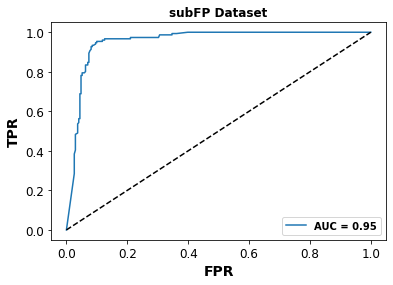

In [ ]:


RocCurveDisplay.from_estimator(rf,X_test,y_test)
plt.plot([0,1],[0,1],"--k")

plt.xlabel("FPR",weight="bold",size=14)
plt.ylabel("TPR",weight="bold",size=14)
plt.xticks(size=12)
plt.yticks(size=12)


plt.title("subFP Dataset",weight="bold")
legend_properties = {'weight':'bold'}


plt.legend(["AUC = 0.95"],prop=legend_properties,loc="lower right")

plt.savefig("subFP ROC.tiff",dpi=300)

plt.show()


In [ ]:
print(classification_report(y_test,yHat_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       271
           1       0.86      0.91      0.89       151

    accuracy                           0.92       422
   macro avg       0.91      0.92      0.91       422
weighted avg       0.92      0.92      0.92       422



In [ ]:
cm = confusion_matrix(y_test,yHat_test)

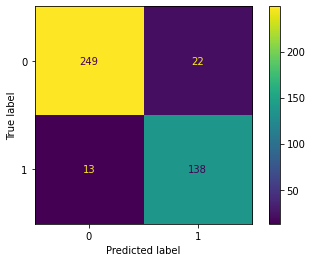

In [ ]:
disp = ConfusionMatrixDisplay(cm)

disp.plot()

In [ ]:
import pickle

In [ ]:
pickle.dump(rf, open('caspase_model.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('caspase_model.pkl', 'rb'))

In [ ]:
feat_imp = pd.Series(rf.feature_importances_,index=X.columns).nlargest(15)

In [ ]:
feat_imp

SubFP49     0.096897
SubFP2      0.065974
SubFP214    0.058977
SubFP84     0.057148
SubFP3      0.040450
SubFP88     0.040418
SubFP100    0.033867
SubFP105    0.028468
SubFP18     0.028381
SubFP135    0.025838
SubFP137    0.025745
SubFP1      0.025589
SubFP184    0.024421
SubFP224    0.021526
SubFP9      0.020780
dtype: float64

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

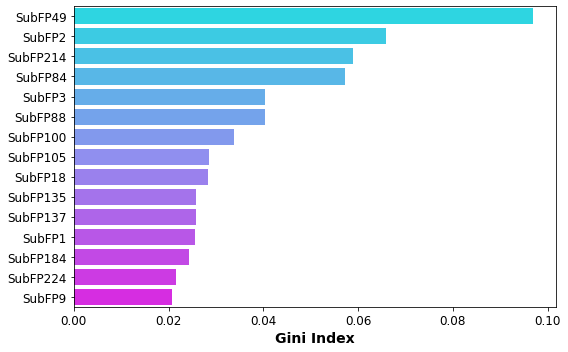

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x =feat_imp,y = feat_imp.index,palette="cool")

plt.xlabel("Gini Index",weight="bold",size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.tight_layout()

plt.savefig("feat_importance.png",dpi=300)
plt.show()